In [2]:
import pandas as pd # pandas is a package and is helpful for data manipulation

In [3]:
filepath_hos = "/Users/magnolia/Desktop/mdst_workshops/mdst_workshops/Workshop3/exploratory data analysis/HospitalAdmissionsData.csv";
hos = pd.read_csv(filepath_hos)





Show the summary statistics for the admission length.
What is the most common admission type, insurance type, religion type, race, and diagnosis (Dx)?
Show a histogram for admission days (with appropriate labels, titles, etc), and also show a histogram for admission days on a log scale. Describe what you see.
Compare the average length of admission between those who died versus those who did not die. Show a visualization, with appropriate labels, titles, etc.
Describe the association between death and insurance type and show a visualization or test.


a. What are the column headers or features in this data set?:

In [4]:
hos.columns

Index(['ID', 'AdmissionLengthDays', 'Death_1', 'Admission_Type',
       'Insurance_Type', 'EnglishLanguage_1', 'Religion_Type', 'Married_1',
       'Race', 'Dx'],
      dtype='object')

In [5]:
hos.head()

,ID,AdmissionLengthDays,Death_1,Admission_Type,Insurance_Type,EnglishLanguage_1,Religion_Type,Married_1,Race,Dx
0,42862,4.277778,0,elective,private,1,episcopalian,1,white,mitral stenosis\mitral valve replacement /sda
1,5967,26.122917,0,elective,private,0,catholic,1,white,duodenal mass/sda
2,50952,7.028472,1,emergency,medicare,1,catholic,0,asian - japanese,? serotonin syndrome
3,17138,34.187500,0,elective,medicare,1,catholic,1,white,abdominal aortic aneurysm/sda
4,27703,6.165972,0,elective,government,0,protestant quaker,0,black/african american,absence/sda


In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
hos.tail()

,ID,AdmissionLengthDays,Death_1,Admission_Type,Insurance_Type,EnglishLanguage_1,Religion_Type,Married_1,Race,Dx
58858,42349,12.177083,0,elective,medicare,1,catholic,1,white,zenker's diverticulum/sda
58859,57461,10.613889,0,elective,medicare,1,catholic,0,white,zenker's diverticulum/sda
58860,11800,1.095139,0,emergency,private,0,unobtainable,0,white,zone 2 neck injury
58861,54574,2.925000,0,emergency,medicare,1,not specified,0,black/african american,zoster vs. meningitis
58862,29394,2.851389,0,emergency,private,1,unobtainable,0,white,zygomatic fracture left


b. How many features are floats? How many are integers?

In [8]:
hos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58863 entries, 0 to 58862
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   58863 non-null  int64  
 1   AdmissionLengthDays  58863 non-null  float64
 2   Death_1              58863 non-null  int64  
 3   Admission_Type       58863 non-null  object 
 4   Insurance_Type       58863 non-null  object 
 5   EnglishLanguage_1    58863 non-null  int64  
 6   Religion_Type        58408 non-null  object 
 7   Married_1            58863 non-null  int64  
 8   Race                 58863 non-null  object 
 9   Dx                   58863 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 4.5+ MB


In [9]:
hos.shape

(58863, 10)

In [26]:
hos.describe()

,ID,AdmissionLengthDays,Death_1,EnglishLanguage_1,Married_1
count,58863.000000,58863.000000,58863.000000,58863.000000,58863.000000
mean,29508.211984,10.138978,0.099417,0.571072,0.410665
std,17026.189024,12.465611,0.299224,0.494927,0.491959
min,1.000000,-0.945139,0.000000,0.000000,0.000000
25%,14762.500000,3.743056,0.000000,0.000000,0.000000
50%,29523.000000,6.465972,0.000000,1.000000,0.000000
75%,44254.500000,11.798264,0.000000,1.000000,1.000000
max,58976.000000,294.660417,1.000000,1.000000,1.000000


c. Which features are objects (non-numeric variables)?

In [11]:
hos.describe(include='object')

,Admission_Type,Insurance_Type,Religion_Type,Race,Dx
count,58863,58863,58408,58863,58863
unique,4,5,20,41,15647
top,emergency,medicare,catholic,white,newborn
freq,41987,28157,20561,40927,7823


d. What are the possible 'values' for insurance type?

In [12]:
hos["Insurance_Type"].unique()

array(['private', 'medicare', 'government', 'medicaid', 'self pay'],
      dtype=object)

e. Show the summary statistics for the admission length.

In [21]:
hos.Admission_Type.describe()

count         58863
unique            4
top       emergency
freq          41987
Name: Admission_Type, dtype: object

In [22]:
import numpy as np
import matplotlib.pyplot as plt

f. What is the most common admission type, insurance type, religion type, race, and diagnosis (Dx)?


In [27]:
hos.describe(include = "object")

,Admission_Type,Insurance_Type,Religion_Type,Race,Dx
count,58863,58863,58408,58863,58863
unique,4,5,20,41,15647
top,emergency,medicare,catholic,white,newborn
freq,41987,28157,20561,40927,7823


g. Show a histogram for admission days (with appropriate labels, titles, etc), and also show a histogram for admission days on a log scale. Describe what you see.


Text(0, 0.5, 'Counts')

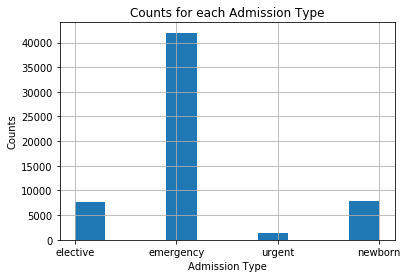

In [42]:
hos.Admission_Type.hist()
plt.title("Counts for each Admission Type")
plt.xlabel("Admission Type")
plt.ylabel("Counts")

Text(0, 0.5, 'Counts on log scale')

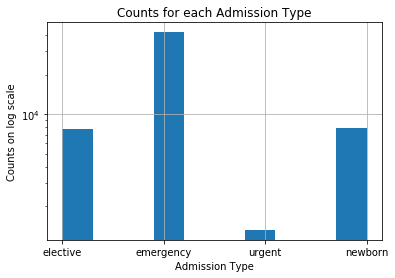

In [43]:
hos.Admission_Type.hist(log=True)
plt.title("Counts for each Admission Type")
plt.xlabel("Admission Type")
plt.ylabel("Counts on log scale")

h. Compare the average length of admission between those who died versus those who did not die. Show a visualization, with appropriate labels, titles, etc.


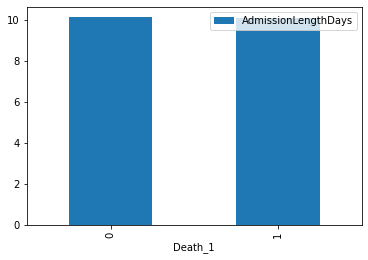

In [44]:
hos2 = hos.groupby("Death_1").mean()
hos2.plot.bar(y=['AdmissionLengthDays'])

i. Describe the association between death and insurance type and show a visualization or test.


In [38]:
pd.crosstab(hos.Death_1, hos.Insurance_Type)

Insurance_Type,government,medicaid,medicare,private,self pay
Death_1,,,,,
0,1691,5400,24253,21152,515
1,90,381,3904,1382,95
